## Data Preprocessing

### Importing libraries

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset and Feature Engineering

In [89]:
dataset = pd.read_csv('data.csv')
columns_to_drop = ['occupation_id',
                    'candidate_id',
                    'number_of_employees_log',
                    'number_of_employees_log',
                    'company_id',
                    'application_attribute_1',
                    'candidate_demographic_variable_1',
                    'candidate_demographic_variable_2',
                    'candidate_demographic_variable_3',
                    'candidate_demographic_variable_4',
                    'ethnicity',
                    'gender',
                    'candidate_demographic_variable_5',
                    'candidate_demographic_variable_6',
                    'candidate_demographic_variable_7',
                    'candidate_demographic_variable_8',
                    'candidate_demographic_variable_9',
                    'candidate_demographic_variable_10',
                    'age']
X = dataset.drop(columns=columns_to_drop).iloc[:, 1:].values
y = dataset.iloc[:, 1].values

### Taking care of missing data

In [90]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(X)
X = imputer.transform(X)

### Encoding categorical data

#### Encoding the Dependent Variable

In [91]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

### Splitting the dataset into the Training set and the Test set

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=1)

### Feature Scaling

In [93]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Classification model

### Decision Tree

#### Feature Selection

In [94]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
k_best = SelectKBest(f_classif, k=10)
X_train = k_best.fit_transform(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [17] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


#### Training the Decision Tree model on the Training set

In [95]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=9, min_samples_split = 40, min_samples_leaf = 20)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=20, min_samples_split=40)

#### Predicting the Test results and Adding Randomness

In [96]:
import random
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

accuracies = []
candidate_chosen = list(np.zeros(len(y_test)))
n_times_candidate_chosen = list(np.zeros(len(y_test)))
for i in range(0, 500):
  y_pred = classifier.predict(X_test[:, k_best.get_support(indices=True)])
  m = pd.DataFrame(np.random.choice([True, False], size=(len(y_pred),), p=[1./10, 9./10]))
  y_pred = np.array(pd.DataFrame(y_pred).mask(m, random.randint(0, 3)))

  for j in range(0, len(y_pred)):
    if y_pred[j] == 1:
      candidate_chosen[j] = 1
      n_times_candidate_chosen[j] += 1

  accuracies.append(accuracy_score(y_test, y_pred))

print('Average Accuracy: ', np.mean(np.array(accuracies)) * 100, '%')
print('Number of candidates with a shot:', len(candidate_chosen))
print('Number of candidates with no shot', len(candidate_chosen) - np.count_nonzero((candidate_chosen)))
print('Minimum percentage chance of getting hired:', np.min(np.array(n_times_candidate_chosen)))

Average Accuracy:  63.65672286554268 %
Number of candidates with a shot: 16667
Number of candidates with no shot 0
Minimum percentage chance of getting hired: 1.0


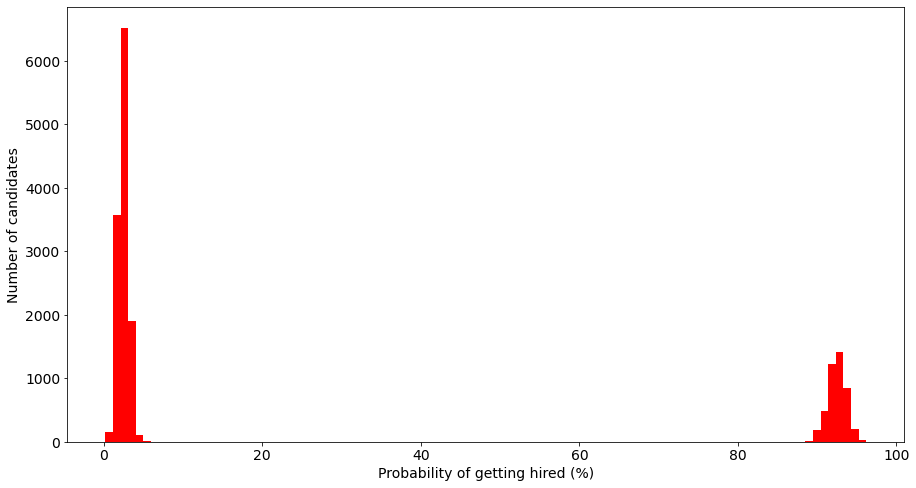

In [97]:
plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14
plt.hist( [(x / 500) * 100 for x in n_times_candidate_chosen], bins=100, color='red')
plt.xlabel('Probability of getting hired (%)', fontsize=14)
plt.ylabel('Number of candidates', fontsize=14)
plt.show()